In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [57]:
import numpy as np
import pandas as pd
import re
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from google.colab import files

In [30]:
def keyword_melt(df):
    df["keyword_melt"] = ""

    for i in range(len(df)):
        j=1
        while ((j != np.NaN) and (j < 13)):
            col = "Keyword "+str(j)
            df["keyword_melt"][i]+=(' '+str(df[col][i]))
            j=j+1
    
    df.to_csv("keyword_data_clean.csv")
    files.download("keyword_data_clean.csv")
    format_text = []

    for i in range(len(df)):
        temp = df["keyword_melt"][i]

        temp = temp.lower()
        temp = re.sub(r'[^\w\s]', '',temp)
        temp = temp.replace("nan","").strip()
        format_text.append(temp)
    return format_text

row_col_names = []
def weighted_adjacency_matrix(format_text = "".split()):
    global row_col_names
    vectorizer = CountVectorizer(ngram_range=(1,1)) #No stopwords filtering needed because all of these are keywords
    adj_matrix = vectorizer.fit_transform(format_text)  
    adj_matrix = (adj_matrix.T * adj_matrix)  
    adj_matrix.setdiag(0)                           #All the diagonal values of an adjacency matrix will be zero because there is no self connection
    row_col_names = vectorizer.get_feature_names() 
    df = pd.DataFrame(data = adj_matrix.toarray(), columns = row_col_names, index = row_col_names)
    df.to_csv('adj_matrix.csv')
    files.download('adj_matrix.csv')
    return df

In [31]:
df = pd.read_csv("/content/drive/MyDrive/TextAnalysisProject-main/Keyword_data.csv" , encoding_errors='ignore')
df = df.dropna(how='all')
df = df.reset_index()
format_texts = keyword_melt(df)
weighted_adjacency_matrix(format_texts)

<ipython-input-30-0c2af167cbed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keyword_melt"][i]+=(' '+str(df[col][i]))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ability  accounting  administration  adoption  advantage  \
ability               0           0               0         0          0   
accounting            0           0               0         0          0   
administration        0           0               0         0          0   
adoption              0           0               0         0          0   
advantage             0           0               0         0          0   
...                 ...         ...             ...       ...        ...   
wealth                1           0               0         0          0   
women                 0           2               0         0          0   
work                  2           2               0         0          0   
workflow              0           0               0         0          0   
workplace             1           0               0         0          1   

                agency  aggression  alliances  allocation  ambivalence  ...  \
ability              1           0          0           0            0  ...   
accounting           0           0          0           0            0  ...   
administration       0           0          0           0            0  ...   
adoption             0           0          0           0            0  ...   
advantage            0           0          0           0            0  ...   
...                ...         ...        ...         ...          ...  ...   
wealth               1           0          0           0            0  ...   
women                0           0          0           0            0  ...   
work                 0           3          0           0            1  ...   
workflow             0           0          0           0            0  ...   
workplace            0           3          0           0            0  ...   

                valuation  venture  violence  wage  wages  wealth  women  \
ability                 0        0         0     0      1       1      0   
accounting              0        0         0     0      0       0      2   
administration          0        0         0     1      0       0      0   
adoption                0        0         0     0      0       0      0   
advantage               0        1         0     0      0       0      0   
...                   ...      ...       ...   ...    ...     ...    ...   
wealth                  0        0         0     0      1       0      0   
women                   0        0         0     0      0       0      0   
work                    0        0         4     0      0       0      4   
workflow                0        0         0     0      0       0      0   
workplace               0        0         4     0      0       0      0   

                work  workflow  workplace  
ability            2         0          1  
accounting         2         0          0  
administration     0         0          0  
adoption           0         0          0  
advantage          0         0          1  
...              ...       ...        ...  
wealth             0         0          0  
women              4         0          0  
work               0         0          6  
workflow           0         0          1  
workplace          6         1          0  

[277 rows x 277 columns]

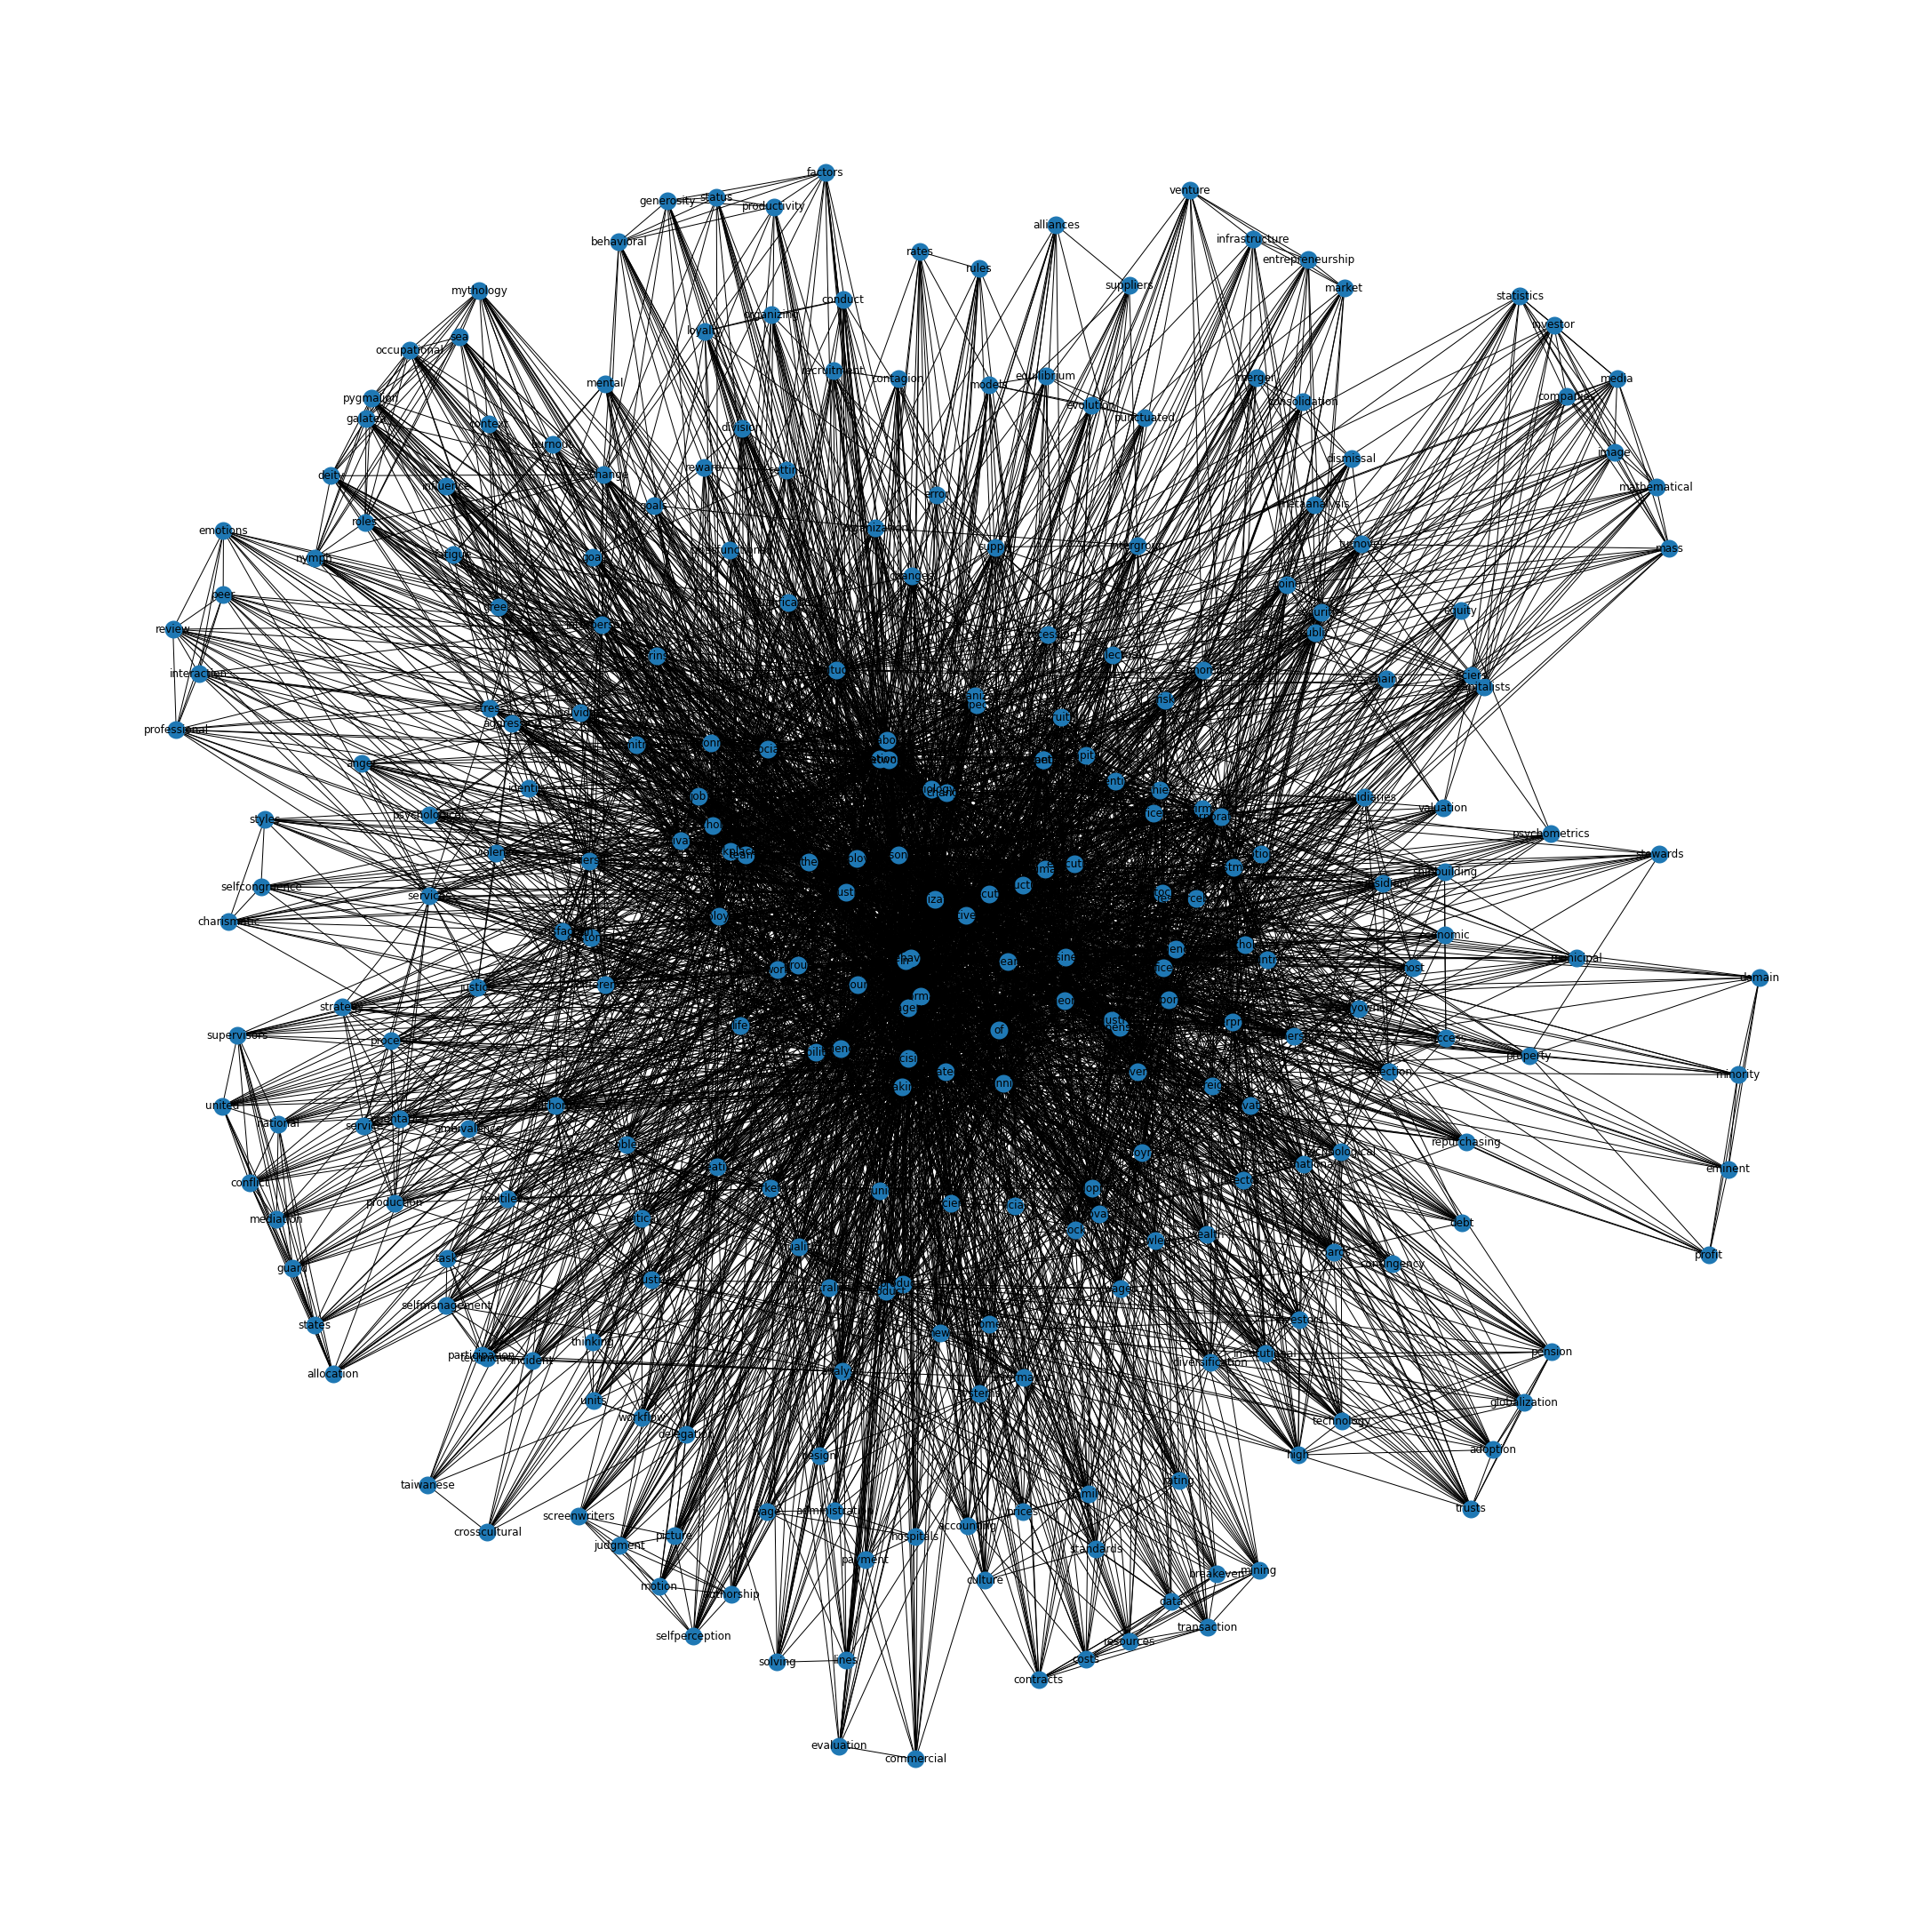

In [39]:
adj_matrix = pd.read_csv("adj_matrix.csv")
adj_array = adj_matrix.to_numpy()
row_col_names_dict={}
matrix_x=[]
for i in range(len(row_col_names)):
    row_col_names_dict[i] = row_col_names[i]
for i in range(len(adj_array)):
    matrix_y=[]
    y_axis=str(adj_array[i]).split()
    for j in range(1,len(y_axis)):
        matrix_y.append(int(y_axis[j].replace(']',"")))
    matrix_x.append(matrix_y)
G=nx.from_numpy_matrix(np.array(matrix_x))
plt.figure(figsize=(30,30))
nx.draw(G,labels= row_col_names_dict, with_labels=True, node_size=100, alpha=1, linewidths=10)

In [43]:
degree = list(G.degree(weight=1))
degree.sort(key=lambda a:a[1],reverse=True)
print("Top 10 nodes by degree:\n")
for i,j in degree[0:10]:
    print(row_col_names[i],j)

Top 10 nodes in degree:

organizational 240
management 235
behavior 205
in 169
industrial 157
business 151
relations 142
decision 140
making 135
of 134


In [46]:
strength = list(G.degree(weight='weight'))
strength.sort(key=lambda a:a[1],reverse=True)
print("Top 10 nodes in strength:\n")
for i,j in strength[0:10]:
    print(row_col_names[i],j)

Top 10 nodes in strength:

management 1712
organizational 1514
in 624
behavior 601
business 545
industrial 519
psychology 386
relations 375
decision 366
personnel 361


In [50]:
pairs = list(G.edges.data("weight",default=1))
pairs.sort(key=lambda a:a[2],reverse=True)
print("Top 10 nodes pairs in weights:\n")
for i,j,k in pairs[0:10]:
    print(row_col_names[i],"to", row_col_names[j],"has weight:",k)

Top 10 nodes pairs in weights:

management to organizational has weight: 109
behavior to organizational has weight: 64
industrial to management has weight: 52
in to management has weight: 51
industrial to organizational has weight: 49
behavior to management has weight: 47
management to personnel has weight: 44
effectiveness to organizational has weight: 40
in to organizational has weight: 40
management to science has weight: 38


[Text(0, 0.5, 'Average Strength'),
 Text(0.5, 0, 'Average Degree'),
 Text(0.5, 1.0, 'scatter plot for avg strength vs avg degree')]

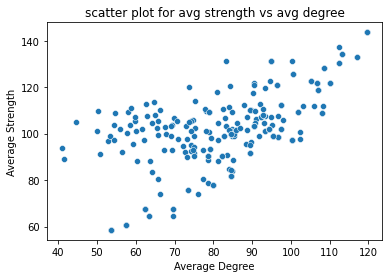

In [53]:
import seaborn as sns

avg_strength=nx.average_neighbor_degree(G,weight="weight")

avg_degree=nx.average_neighbor_degree(G,weight=1)

plt=sns.scatterplot(x=avg_degree,y=avg_strength)
plt.set(xlabel="Average Degree", ylabel = "Average Strength", title="scatter plot for avg strength vs avg degree")
 

**TASK - 2**

In [62]:
import seaborn as sns
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

In [63]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [99]:
def word_frequency(tweet_file, year):
    stop_words = set(stopwords.words('english'))
    stopword=""

    for i in range(len(tweet_file)):
        tweet_file["tweet"][i]= re.sub(r"(?:\@|https?\://)\S+", '', tweet_file["tweet"][i])
        tweet_file["tweet"][i]= re.sub(r'[^\w\s]', '', tweet_file["tweet"][i])
        tokens = word_tokenize(tweet_file["tweet"][i])
        no_stop_words = [w for w in tokens if not w.lower() in stop_words]
        tweet_file["tweet"][i]=' '.join(no_stop_words)
        stopword+=tweet_file["tweet"][i]
    stopword = stopword.translate(str.maketrans('','',string.punctuation))
    count = Counter(stopword.split())

    word_freq = pd.DataFrame(count.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_freq.to_csv("freq"+year+"-freq.csv")
    files.download("freq"+year+"-freq.csv") 
    return word_freq


In [96]:
years = ["2017","2018","2019","2020","2021","2022"]
for i in years:
    word_frequency(pd.read_csv("/content/drive/MyDrive/TextAnalysisProject-main/tweets/"+i+".csv"),i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
from google.colab import files
uploaded = files.upload()

Saving freq2020-freq.csv to freq2020-freq (1).csv
Saving freq2021-freq.csv to freq2021-freq (1).csv
Saving freq2022-freq.csv to freq2022-freq (1).csv
Saving freq2017-freq.csv to freq2017-freq (1).csv
Saving freq2018-freq.csv to freq2018-freq (1).csv
Saving freq2019-freq.csv to freq2019-freq (1).csv


In [98]:
df1=pd.read_csv('freq2017-freq.csv')
df2=pd.read_csv('freq2018-freq.csv')
df3=pd.read_csv('freq2019-freq.csv')
df4=pd.read_csv('freq2020-freq.csv')
df5=pd.read_csv('freq2021-freq.csv')
df6=pd.read_csv('freq2022-freq.csv')

Unnamed: 0    word  frequency
0         112     amp        210
1          99   Tesla        206
2          52   Model        136
3          34    like        122
4         181  rocket        116
5          61    good         88
6          48    next         80
7         478     car         79
8          53       3         78
9         177  launch         75

[Text(0.5, 1.0, 'Word frequency for 2017 elon tweets')]

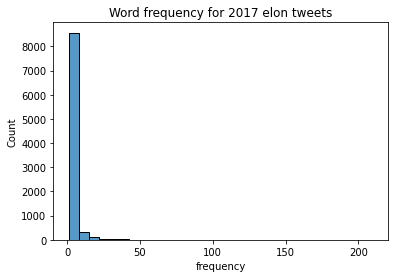

In [100]:
display(df1.head(10))
sns.histplot(x='frequency',data = df1,bins=30).set(title="Word frequency for 2017 elon tweets")

Unnamed: 0    word  frequency
0          17     amp        522
1           1   Tesla        228
2         102     car        101
3         124       3         97
4          90    like         83
5         123   Model         82
6         589  people         57
7         277   would         56
8         799    make         55
9          53    next         53

[Text(0.5, 1.0, 'Word frequency for 2018 elon tweets')]

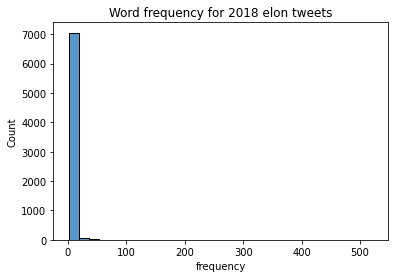

In [101]:
display(df2.head(10))
sns.histplot(x='frequency',data = df2,bins=30).set(title="Word frequency for 2018 elon tweets")

Unnamed: 0    word  frequency
0           8     amp       1194
1         199   Tesla        617
2         758    like        267
3        1223   Model        263
4         223     car        230
5         163       3        229
6         267   would        192
7         498    next        177
8          43    good        174
9        1237  rocket        163

[Text(0.5, 1.0, 'Word frequency for 2019 elon tweets')]

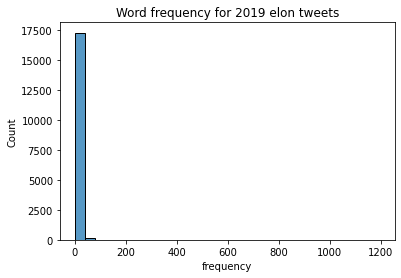

In [102]:
display(df3.head(10))
sns.histplot(x='frequency',data = df3,bins=30).set(title="Word frequency for 2019 elon tweets")

Unnamed: 0   word  frequency
0          30    amp       1790
1          10  Tesla        746
2          70   like        337
3         218  Model        285
4         219      3        266
5         377  would        264
6          67    car        264
7         189   much        229
8          45   good        229
9         165   make        211

[Text(0.5, 1.0, 'Word frequency for 2020 elon tweets')]

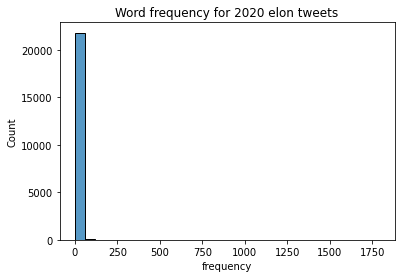

In [103]:
display(df4.head(10))
sns.histplot(x='frequency',data = df4,bins=30).set(title="Word frequency for 2020 elon tweets")

Unnamed: 0        word  frequency
0          31         amp        470
1          47       Tesla        142
2         139       would         75
3         106        like         71
4         191        much         69
5         979        high         59
6         434  production         57
7          30        time         56
8         276        work         56
9          23        next         54

[Text(0.5, 1.0, 'Word frequency for 2021 elon tweets')]

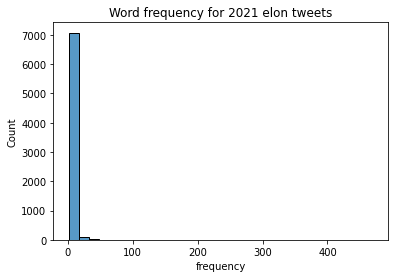

In [105]:
display(df5.head(10))
sns.histplot(x='frequency',data = df5,bins=30).set(title="Word frequency for 2021 elon tweets")

Unnamed: 0      word  frequency
0          41       amp         80
1          60     Tesla         32
2          52    people         26
3         238       one         20
4          67      make         20
5          57     would         18
6         149       car         18
7          48  Starlink         18
8         324      good         16
9          13      time         16

[Text(0.5, 1.0, 'Word frequency for 2022 elon tweets')]

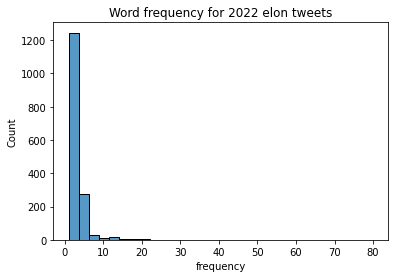

In [106]:
display(df6.head(10))
sns.histplot(x='frequency',data = df6,bins=30).set(title="Word frequency for 2022 elon tweets")

In [ ]:
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import scipy.stats as ss
import numpy as np
import itertools
from nltk.corpus import wordnet

In [107]:
def word_zipf(tweet_file,year):
    stop_words=set(stopwords.words('english'))
    stopword=""

    for i in range(len(tweet_file)):
        tweet_file["tweet"][i]= re.sub(r"(?:\@|https?\://)\S+", '', tweet_file["tweet"][i])
        tweet_file["tweet"][i]= re.sub(r'[^\w\s]', '', tweet_file["tweet"][i])
        tokens=word_tokenize(tweet_file["tweet"][i])
        nostop=[w for w in tokens if not w.lower() in stop_words]
        tweet_file["tweet"][i]=' '.join(nostop)
        stopword += tweet_file["tweet"][i]
    stopword = stopword.translate(str.maketrans('','',string.punctuation))
    counted = Counter(stopword.split())

    tweets = [[w, c] for [w, c] in counted.items()] 
    frequency_rank = ss.rankdata([c for [w, c] in tweets])
    for i in range(len(tweets)):
        tweets[i].append(frequency_rank[i])
    word_rank = pd.DataFrame(tweets,columns=['word','frequency','rankdata'])
    word_rank['log_freq']=np.log(word_rank['frequency'])
    word_rank['log_rank']=np.log(word_rank['rankdata'])
    word_rank.to_csv("df"+year+".csv")
    files.download("df"+year+".csv")
    return word_rank


In [84]:
years=["2017","2018","2019","2020","2021","2022"]
for i in years:
    word_zipf(pd.read_csv("/content/drive/MyDrive/TextAnalysisProject-main/tweets/"+i+".csv"),i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
from google.colab import files
uploaded = files.upload()

Saving df2017.csv to df2017 (1).csv
Saving df2018.csv to df2018 (1).csv
Saving df2019.csv to df2019 (1).csv
Saving df2020.csv to df2020 (1).csv
Saving df2021.csv to df2021 (1).csv
Saving df2022.csv to df2022 (1).csv


In [87]:
df1=pd.read_csv('df2017.csv')
df2=pd.read_csv('df2018.csv')
df3=pd.read_csv('df2019.csv')
df4=pd.read_csv('df2020.csv')
df5=pd.read_csv('df2021.csv')
df6=pd.read_csv('df2022.csv')

[Text(0.5, 1.0, 'Log log plot for zipf for 2017 elon tweets')]

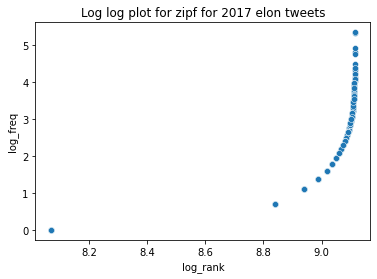

In [88]:
sns.scatterplot(x='log_rank',y='log_freq',data = df1).set(title="Log log plot for zipf for 2017 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2018 elon tweets')]

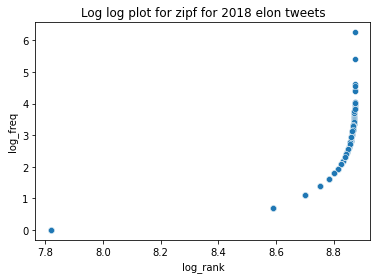

In [89]:
sns.scatterplot(x='log_rank',y='log_freq',data = df2).set(title="Log log plot for zipf for 2018 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2019 elon tweets')]

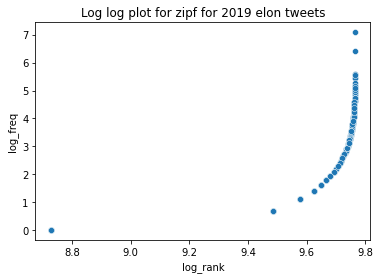

In [90]:
sns.scatterplot(x='log_rank',y='log_freq',data = df3).set(title="Log log plot for zipf for 2019 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2020 elon tweets')]

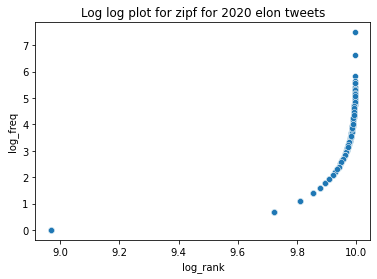

In [91]:
sns.scatterplot(x='log_rank',y='log_freq',data = df4).set(title="Log log plot for zipf for 2020 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2021 elon tweets')]

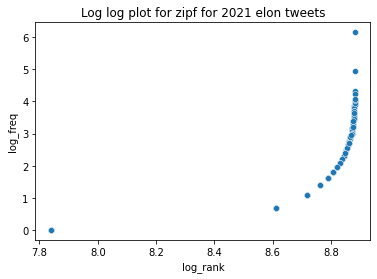

In [93]:
sns.scatterplot(x='log_rank',y='log_freq',data = df5).set(title="Log log plot for zipf for 2021 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2022 elon tweets')]

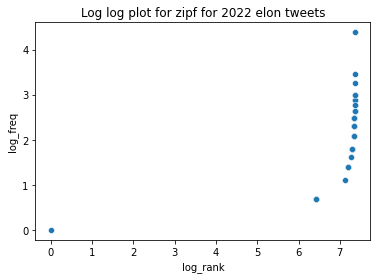

In [94]:
sns.scatterplot(x='log_rank',y='log_freq',data = df6).set(title="Log log plot for zipf for 2022 elon tweets")